In [1]:
import pandas as pd

# Replace 'my_data.csv' with your CSV file path or URL
csv_file_path = 'acndata_sessions.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Print the first 5 rows
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,39,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN
1,5bc90cb9f9af8b0d7fe77cd3,39,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN
2,5bc90cb9f9af8b0d7fe77cd4,39,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN
3,5bc90cb9f9af8b0d7fe77cd5,39,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN
4,5bc90cb9f9af8b0d7fe77cd6,39,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your DataFrame (assuming you've already loaded it into 'df')
# df = pd.read_csv('your_data.csv')  # Example if starting from CSV

# 2. Convert time columns to datetime
df['connectionTime'] = pd.to_datetime(df['connectionTime'],
                                      format='%a, %d %b %Y %H:%M:%S GMT',
                                      errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'],
                                      format='%a, %d %b %Y %H:%M:%S GMT',
                                      errors='coerce')

# 3. Create a numeric feature: total connected duration (hours)
df['connected_duration_hours'] = (df['disconnectTime'] - df['connectionTime']).dt.total_seconds() / 3600

# 4. Define features (X) and target (y)
X = df[['connected_duration_hours']]  # You could add more features here
y = df['kWhDelivered']

# 5. Split into training and testing sets
# Adjust test_size or random_state as needed
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = model.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²):         {r2:.3f}")
print("========================\n")

print("=== Model Coefficients ===")
print(f"Coefficient for connected_duration_hours: {model.coef_[0]:.3f}")
print(f"Intercept:                                 {model.intercept_:.3f}")

=== Model Evaluation ===
Mean Squared Error (MSE): 33.293
R-squared (R²):         0.090

=== Model Coefficients ===
Coefficient for connected_duration_hours: 0.296
Intercept:                                 7.294


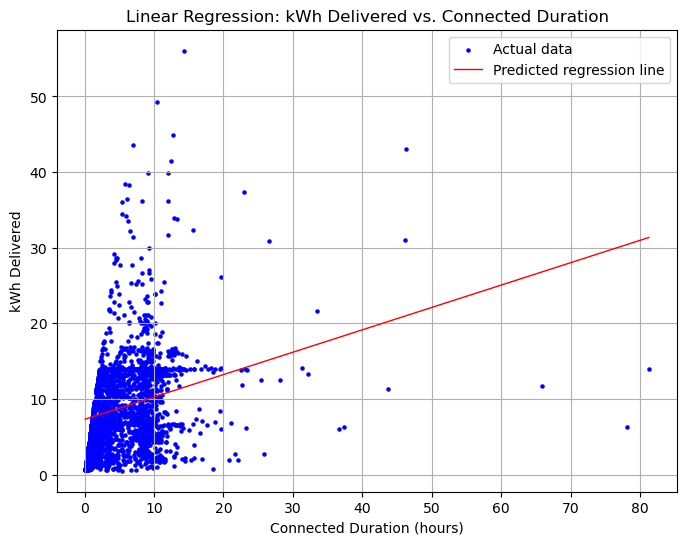

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# After training your model (see the previous code snippet):
# model = LinearRegression()
# model.fit(X_train, y_train)

# 1. Predict on the test set
y_pred = model.predict(X_test)

# 2. Create a scatter plot for the actual test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test['connected_duration_hours'], y_test, color='blue', s=5, label='Actual data')

# 3. Sort the test set by 'connected_duration_hours' so we can draw a proper line
X_test_sorted = X_test.sort_values(by='connected_duration_hours')
y_pred_sorted = model.predict(X_test_sorted)

# 4. Plot the regression line
plt.plot(X_test_sorted['connected_duration_hours'], y_pred_sorted, color='red', linewidth=1, label='Predicted regression line')

# 5. Label the axes and add a title
plt.xlabel('Connected Duration (hours)')
plt.ylabel('kWh Delivered')
plt.title('Linear Regression: kWh Delivered vs. Connected Duration')
plt.legend()
plt.grid(True)

# 6. Display the plot
plt.show()

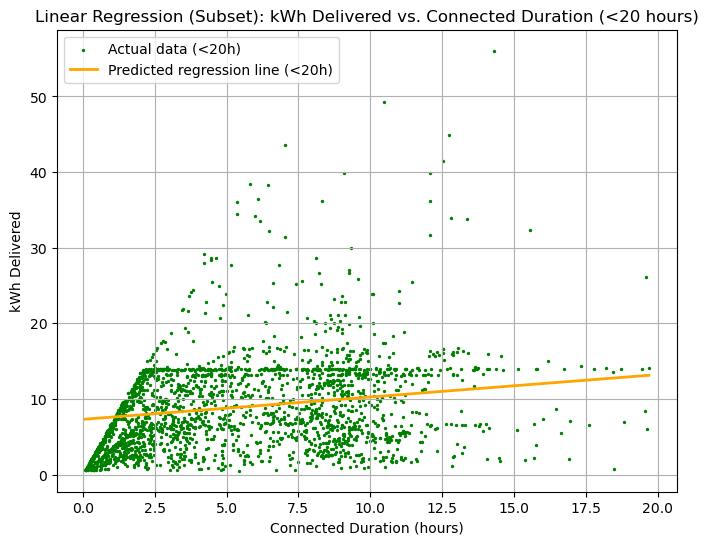

In [ ]:
# Filter test set to only include sessions shorter than 20 hours
mask = X_test['connected_duration_hours'] < 20
X_test_filtered = X_test[mask]
y_test_filtered = y_test[mask]

# Sort the filtered set for a proper regression line
X_test_filtered_sorted = X_test_filtered.sort_values(by='connected_duration_hours')
y_pred_filtered_sorted = model.predict(X_test_filtered_sorted)

# Plot the filtered data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_filtered['connected_duration_hours'], y_test_filtered, color='green', s=1, label='Actual data (<20h)')
plt.plot(X_test_filtered_sorted['connected_duration_hours'], y_pred_filtered_sorted, color='orange', linewidth=2, label='Predicted regression line (<20h)')

# Labeling
plt.xlabel('Connected Duration (hours)')
plt.ylabel('kWh Delivered')
plt.title('Linear Regression (Subset): kWh Delivered vs. Connected Duration (<20 hours)')
plt.legend()
plt.grid(True)

plt.show()


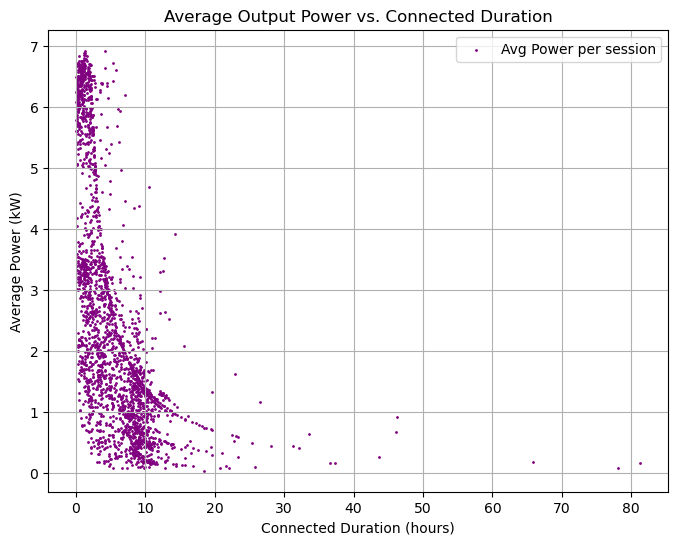

In [11]:
# Calculate average power for each test sample
average_power = y_test / X_test['connected_duration_hours']

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test['connected_duration_hours'], average_power, color='purple', s=1, label='Avg Power per session')

# Labeling
plt.xlabel('Connected Duration (hours)')
plt.ylabel('Average Power (kW)')
plt.title('Average Output Power vs. Connected Duration')
plt.grid(True)
plt.legend()

plt.show()


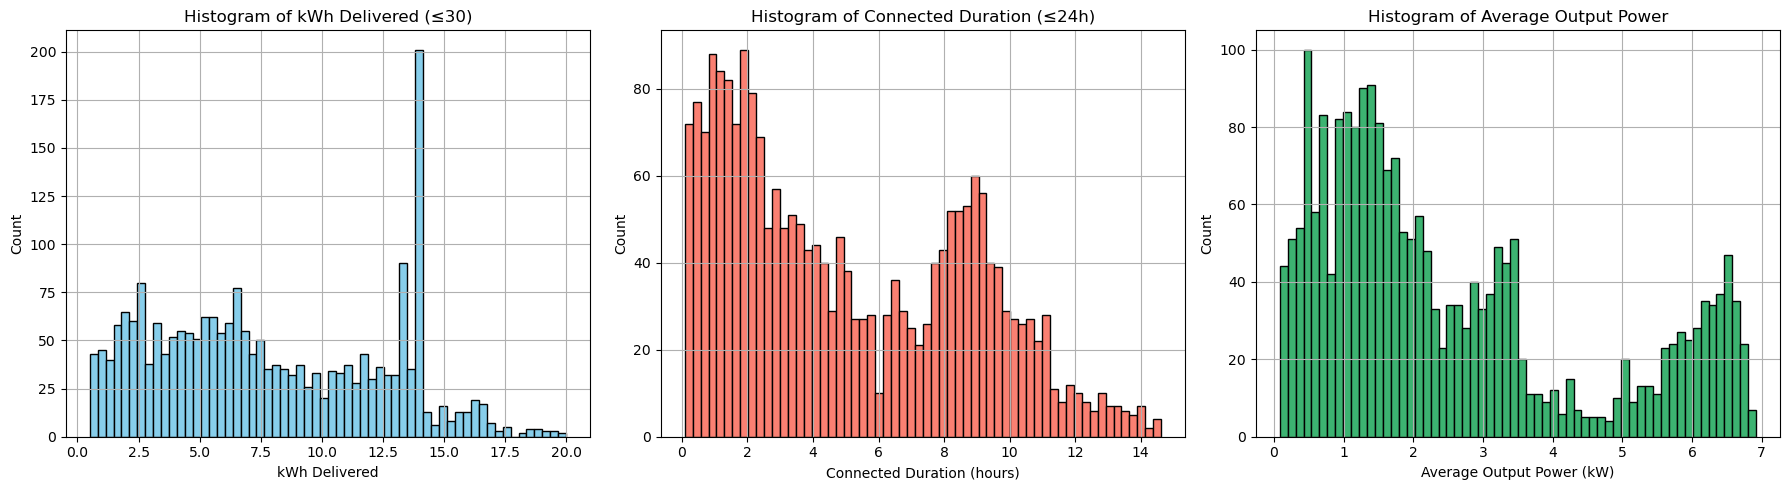

In [18]:
# Compute average power (kW)
average_power = y_test / X_test['connected_duration_hours']

# Apply filters: max 24h duration, max 30 kWh
mask = (X_test['connected_duration_hours'] <= 15) & (y_test <= 20)
filtered_duration = X_test['connected_duration_hours'][mask]
filtered_kwh = y_test[mask]
filtered_avg_power = average_power[mask]

plt.figure(figsize=(18, 5))

# 1. Histogram for kWh Delivered
plt.subplot(1, 3, 1)
plt.hist(filtered_kwh, bins=60, color='skyblue', edgecolor='black')
plt.xlabel('kWh Delivered')
plt.ylabel('Count')
plt.title('Histogram of kWh Delivered (≤30)')
plt.grid(True)

# 2. Histogram for Connected Duration
plt.subplot(1, 3, 2)
plt.hist(filtered_duration, bins=60, color='salmon', edgecolor='black')
plt.xlabel('Connected Duration (hours)')
plt.ylabel('Count')
plt.title('Histogram of Connected Duration (≤24h)')
plt.grid(True)

# 3. Histogram for Average Power
plt.subplot(1, 3, 3)
plt.hist(filtered_avg_power, bins=60, color='mediumseagreen', edgecolor='black')
plt.xlabel('Average Output Power (kW)')
plt.ylabel('Count')
plt.title('Histogram of Average Output Power')
plt.grid(True)

plt.tight_layout()
plt.show()


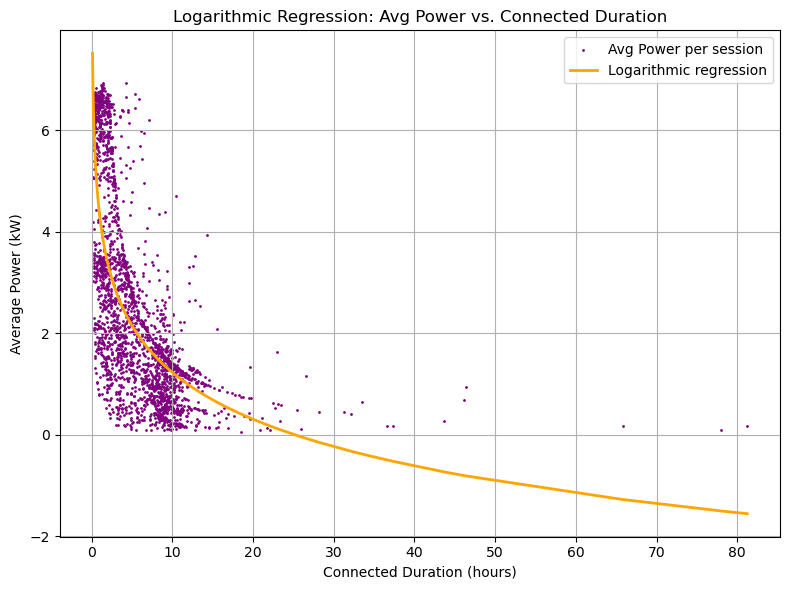

Logarithmic Regression:
MSE = 1.9344, R² = 0.5012


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Calculate average power
average_power = y_test / X_test['connected_duration_hours']
connected_duration = X_test['connected_duration_hours']

# Filter out invalid values
mask = (connected_duration > 0) & (average_power > 0)
x = connected_duration[mask].values.reshape(-1, 1)
y = average_power[mask].values

# Apply logarithmic transformation to x
x_log = np.log(x)

# Fit the logarithmic model: y = β0 + β1 * log(x)
model_log = LinearRegression()
model_log.fit(x_log, y)

# Create a smooth line: sort x, then predict using log(x)
x_sorted = np.sort(x.flatten())
x_log_sorted = np.log(x_sorted).reshape(-1, 1)
y_pred_sorted = model_log.predict(x_log_sorted)

# Evaluate model performance
y_pred_all = model_log.predict(x_log)
mse = mean_squared_error(y, y_pred_all)
r2 = r2_score(y, y_pred_all)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='purple', s=1, label='Avg Power per session')
plt.plot(x_sorted, y_pred_sorted, color='orange', linewidth=2, label='Logarithmic regression')

# Labels and legend
plt.xlabel('Connected Duration (hours)')
plt.ylabel('Average Power (kW)')
plt.title('Logarithmic Regression: Avg Power vs. Connected Duration')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print performance
print(f"Logarithmic Regression:\nMSE = {mse:.4f}, R² = {r2:.4f}")


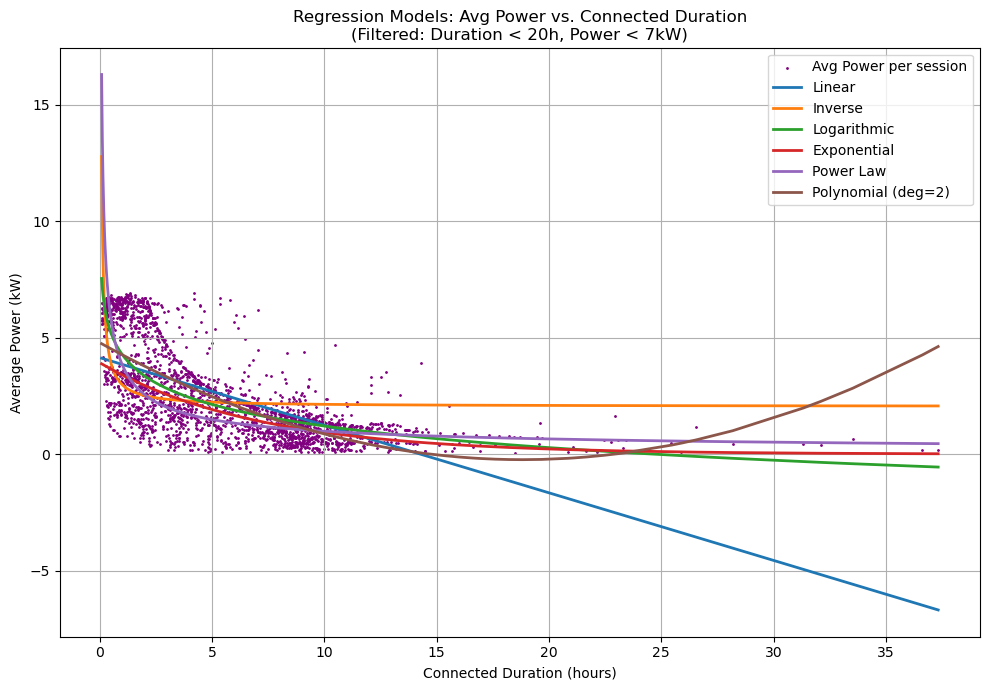

Model Performance (Filtered Data: Duration < 20h, Power < 7kW):

Linear                 | MSE: 2.3031 | R²: 0.4058
Inverse                | MSE: 2.9897 | R²: 0.2286
Logarithmic            | MSE: 1.9333 | R²: 0.5012
Exponential            | MSE: 2.2660 | R²: 0.4153
Power Law              | MSE: 3.1066 | R²: 0.1984
Polynomial (deg=2)     | MSE: 1.9586 | R²: 0.4946


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# === Data Preparation ===
average_power = y_test / X_test['connected_duration_hours']
connected_duration = X_test['connected_duration_hours']

# Apply filters: avg power 0–7 kW, duration < 20h
mask = (
    (connected_duration > 0) &
    (connected_duration < 40) &
    (average_power > 0) &
    (average_power < 7)
)
x = connected_duration[mask].values.reshape(-1, 1)
y = average_power[mask].values
x_flat = x.flatten()

# === Results Dictionary ===
results = {}

def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results[name] = (mse, r2)

# === Prepare sorted x for smooth lines ===
x_sorted = np.sort(x_flat)
x_sorted_reshaped = x_sorted.reshape(-1, 1)

# === Plot Setup ===
plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='purple', s=1, label='Avg Power per session')

# === 1. Linear ===
model_lin = LinearRegression()
model_lin.fit(x, y)
y_pred_lin = model_lin.predict(x)
evaluate("Linear", y, y_pred_lin)
plt.plot(x_sorted, model_lin.predict(x_sorted_reshaped), label="Linear", linewidth=2)

# === 2. Inverse ===
x_inv = 1 / x
model_inv = LinearRegression()
model_inv.fit(x_inv, y)
y_pred_inv = model_inv.predict(x_inv)
evaluate("Inverse", y, y_pred_inv)
plt.plot(x_sorted, model_inv.predict(1 / x_sorted_reshaped), label="Inverse", linewidth=2)

# === 3. Logarithmic ===
x_log = np.log(x)
model_log = LinearRegression()
model_log.fit(x_log, y)
y_pred_log = model_log.predict(x_log)
evaluate("Logarithmic", y, y_pred_log)
plt.plot(x_sorted, model_log.predict(np.log(x_sorted_reshaped)), label="Logarithmic", linewidth=2)

# === 4. Exponential ===
y_log = np.log(y)
model_exp = LinearRegression()
model_exp.fit(x, y_log)
y_pred_exp = np.exp(model_exp.predict(x))
evaluate("Exponential", y, y_pred_exp)
plt.plot(x_sorted, np.exp(model_exp.predict(x_sorted_reshaped)), label="Exponential", linewidth=2)

# === 5. Power Law ===
model_pow = LinearRegression()
model_pow.fit(np.log(x), np.log(y))
y_pred_pow = np.exp(model_pow.predict(np.log(x)))
evaluate("Power Law", y, y_pred_pow)
plt.plot(x_sorted, np.exp(model_pow.predict(np.log(x_sorted_reshaped))), label="Power Law", linewidth=2)

# === 6. Polynomial (deg 2) ===
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model_poly = LinearRegression()
model_poly.fit(x_poly, y)
y_pred_poly = model_poly.predict(x_poly)
evaluate("Polynomial (deg=2)", y, y_pred_poly)
x_sorted_poly = poly.transform(x_sorted_reshaped)
plt.plot(x_sorted, model_poly.predict(x_sorted_poly), label="Polynomial (deg=2)", linewidth=2)

# === Final Plot Styling ===
plt.xlabel('Connected Duration (hours)')
plt.ylabel('Average Power (kW)')
plt.title('Regression Models: Avg Power vs. Connected Duration\n(Filtered: Duration < 20h, Power < 7kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Print Model Performance ===
print("Model Performance (Filtered Data: Duration < 20h, Power < 7kW):\n")
for name, (mse, r2) in results.items():
    print(f"{name:22s} | MSE: {mse:.4f} | R²: {r2:.4f}")



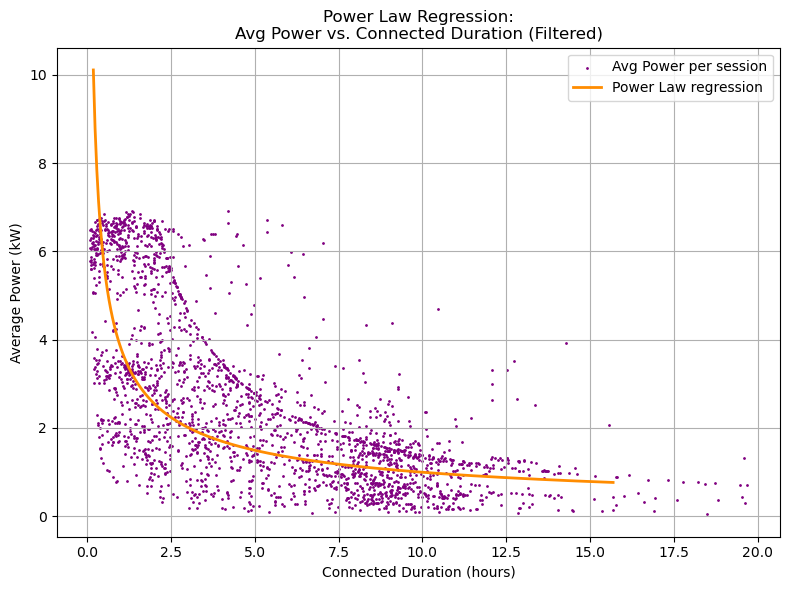

Power Law Regression:
MSE = 3.0679
R²  = 0.2073


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
average_power = y_test / X_test['connected_duration_hours']
connected_duration = X_test['connected_duration_hours']

# Filter: duration < 20h, power between 0 and 7
mask = (
    (connected_duration > 0) &
    (connected_duration < 20) &
    (average_power > 0) &
    (average_power < 7)
)
x = connected_duration[mask].values.reshape(-1, 1)
y = average_power[mask].values

# Log-transform both x and y
log_x = np.log(x)
log_y = np.log(y)

# Fit power law: log(y) = β0 + β1 * log(x)
model_pow = LinearRegression()
model_pow.fit(log_x, log_y)

# Define x-range for regression line: within data's 1st–99th percentiles
x_p1, x_p99 = np.percentile(x, [1, 99])
x_range = np.linspace(x_p1, x_p99, 300).reshape(-1, 1)

# Predict regression line
y_pred_log = model_pow.predict(np.log(x_range))
y_pred = np.exp(y_pred_log)

# Evaluate model
y_pred_all = np.exp(model_pow.predict(log_x))
mse = mean_squared_error(y, y_pred_all)
r2 = r2_score(y, y_pred_all)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='purple', s=1, label='Avg Power per session')
plt.plot(x_range, y_pred, color='darkorange', linewidth=2, label='Power Law regression')

# Labeling
plt.xlabel('Connected Duration (hours)')
plt.ylabel('Average Power (kW)')
plt.title('Power Law Regression:\nAvg Power vs. Connected Duration (Filtered)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print model performance
print("Power Law Regression:")
print(f"MSE = {mse:.4f}")
print(f"R²  = {r2:.4f}")


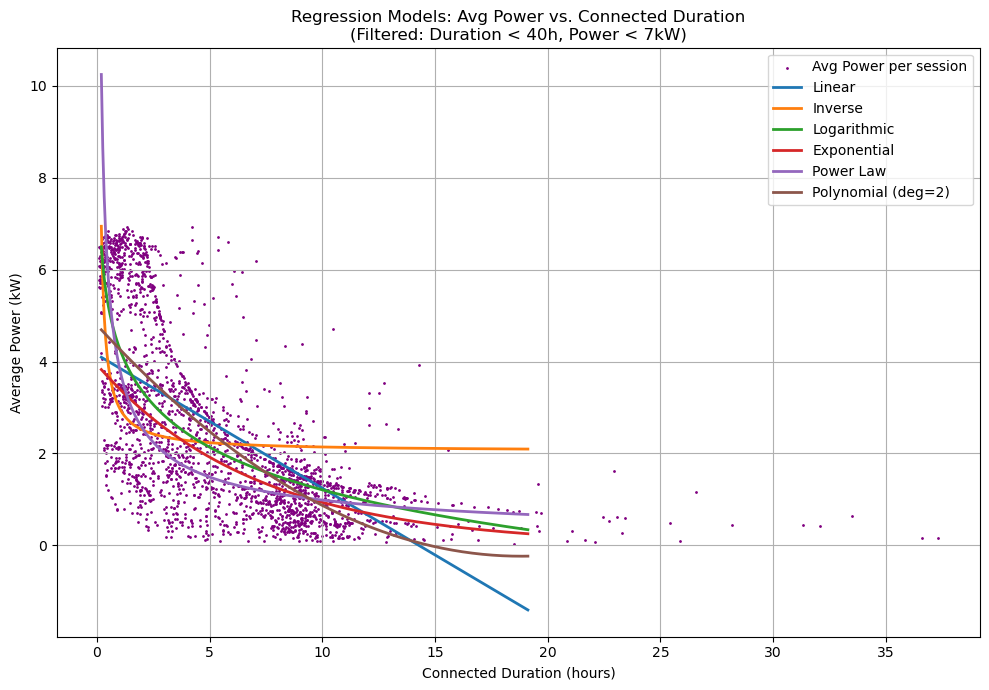

Model Performance (Filtered Data: Duration < 40h, Power < 7kW):

Linear                 | MSE: 2.3031 | R²: 0.4058
Inverse                | MSE: 2.9897 | R²: 0.2286
Logarithmic            | MSE: 1.9333 | R²: 0.5012
Exponential            | MSE: 2.2660 | R²: 0.4153
Power Law              | MSE: 3.1066 | R²: 0.1984
Polynomial (deg=2)     | MSE: 1.9586 | R²: 0.4946


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# === Data Preparation ===
average_power = y_test / X_test['connected_duration_hours']
connected_duration = X_test['connected_duration_hours']

# Apply filters: avg power 0–7 kW, duration < 40h
mask = (
    (connected_duration > 0) &
    (connected_duration < 40) &
    (average_power > 0) &
    (average_power < 7)
)
x = connected_duration[mask].values.reshape(-1, 1)
y = average_power[mask].values

# === Results Dictionary ===
results = {}

def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results[name] = (mse, r2)

# === Define smooth x-range only within filtered data ===
x_min, x_max = np.percentile(x, [1, 99])
x_smooth = np.linspace(x_min, x_max, 300).reshape(-1, 1)

# === Plot Setup ===
plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='purple', s=1, label='Avg Power per session')

# === 1. Linear ===
model_lin = LinearRegression()
model_lin.fit(x, y)
y_pred_lin = model_lin.predict(x)
evaluate("Linear", y, y_pred_lin)
plt.plot(x_smooth, model_lin.predict(x_smooth), label="Linear", linewidth=2)

# === 2. Inverse ===
x_inv = 1 / x
model_inv = LinearRegression()
model_inv.fit(x_inv, y)
y_pred_inv = model_inv.predict(x_inv)
evaluate("Inverse", y, y_pred_inv)
plt.plot(x_smooth, model_inv.predict(1 / x_smooth), label="Inverse", linewidth=2)

# === 3. Logarithmic ===
x_log = np.log(x)
model_log = LinearRegression()
model_log.fit(x_log, y)
y_pred_log = model_log.predict(x_log)
evaluate("Logarithmic", y, y_pred_log)
plt.plot(x_smooth, model_log.predict(np.log(x_smooth)), label="Logarithmic", linewidth=2)

# === 4. Exponential ===
y_log = np.log(y)
model_exp = LinearRegression()
model_exp.fit(x, y_log)
y_pred_exp = np.exp(model_exp.predict(x))
evaluate("Exponential", y, y_pred_exp)
plt.plot(x_smooth, np.exp(model_exp.predict(x_smooth)), label="Exponential", linewidth=2)

# === 5. Power Law ===
model_pow = LinearRegression()
model_pow.fit(np.log(x), np.log(y))
y_pred_pow = np.exp(model_pow.predict(np.log(x)))
evaluate("Power Law", y, y_pred_pow)
plt.plot(x_smooth, np.exp(model_pow.predict(np.log(x_smooth))), label="Power Law", linewidth=2)

# === 6. Polynomial (deg 2) ===
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model_poly = LinearRegression()
model_poly.fit(x_poly, y)
y_pred_poly = model_poly.predict(x_poly)
evaluate("Polynomial (deg=2)", y, y_pred_poly)
x_smooth_poly = poly.transform(x_smooth)
plt.plot(x_smooth, model_poly.predict(x_smooth_poly), label="Polynomial (deg=2)", linewidth=2)

# === Final Plot Styling ===
plt.xlabel('Connected Duration (hours)')
plt.ylabel('Average Power (kW)')
plt.title('Regression Models: Avg Power vs. Connected Duration\n(Filtered: Duration < 40h, Power < 7kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Print Model Performance ===
print("Model Performance (Filtered Data: Duration < 40h, Power < 7kW):\n")
for name, (mse, r2) in results.items():
    print(f"{name:22s} | MSE: {mse:.4f} | R²: {r2:.4f}")
